# Univariate Linear Regression

Linear regression is a very basic method for performing supervised learning. The goal is to predict a value assigned to a feature vector using a linear combination of weights. There are some surface similarities here to perceptron learning, but the key difference is that perceptrons are used to perform classification rather than regression (regression involves predicting the values of a continuous function, whereas classification involves assigning a discrete label to an input). 

To start with a simple example from Coursera, imagine we want to predict the price of a house based on its size in square feet. We can formulate this prediction for a house $x$ in terms of a weight on the size of the house, plus a bias. To learn the appropriate values of the weight and the bias, we need a number of samples of prices for houses of different square footage. Notationally, we'll combine the bias and weight into a parameter vector $\theta$ such that $H(x) = \theta_0 + \theta_1 x$. For any given value for $\theta$, it is possible define a cost function that measures how well it predicts the values present in the training data. Formally, this cost function is defined in terms of mean squared error over the entire training set of $n$ examples as follows:

$J(\theta) =  \frac{1}{2n} \sum_{i=1}^{n} (H(x_i) - y_i)^2$ 

where $y_i$ is the correct value for example $x_i$. To minimize this cost function, we need to compute the gradient with respect to each parameter in $\theta$:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n} (H(x_i) - y_i) \cdot x_{i_{j}}$

(This gradient is computed using the chain rule given that $H(x)$ is defined in terms of $\theta$ - hence we multiply the term in the sum by the coefficent on the $j^{th}$ parameter of $\theta$).

Now, it is possible to apply the method to a toy dataset to find a line of best fit through a scatter plot. Note that this data is not for houseprices. 

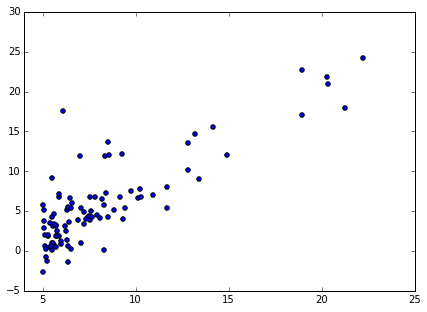

In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('/Users/peterblouw/git/stat-946/data/univariate.txt', delimiter=',')

plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1])
plt.xlim((4,25))
plt.show()

To perform linear regression on this data, we'll initialize a parameter vector and iteratively update it until the cost function is no longer meaningfully decreasing.

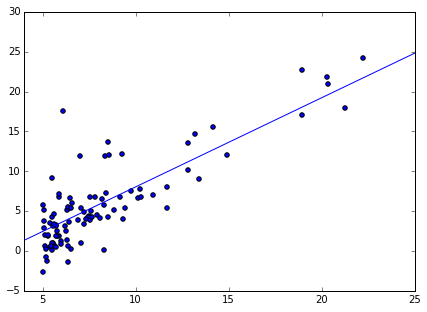

In [149]:
n = len(data)
theta = np.random.rand(2)
rate = 0.02

# Put data into arrays 
bias = np.ones(n).reshape(n,1)
samples = np.hstack((bias, data[:,0].reshape(n,1)))
targets = data[:,1]

# Define the cost function
def cost(theta):
    predict = np.dot(samples, theta)
    return sum(np.square(predict-targets)) / (2.0*n)

# Define the update rule
def update(theta):
    error = np.dot(samples, theta) - targets
    gradient = sum(samples * error.reshape(n,1)) / n # uses broadcasting
    return theta - rate * gradient

# Perform updates
for _ in range(500):
    theta = update(theta)
    
# Obtain prediction of classifier
def predict(x):
    return theta[0] + theta[1]*x

# Plot the results
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1])
plt.plot([4,25],[predict(4),predict(25)])
plt.xlim((4,25))
plt.show()

# Multivariate Linear Regression

To generalize this method to multidimensional data, we simply initialize the parameter vector to include the appropriate number of dimensions. Nothing else needs to be changed because the definitions of the cost function and gradient introduced above are defined in a manner that is agnostic with respect to the dimensionality of the data. 

In this case, the data matches a house's price with its square footage and number of bedrooms. It helps to normalize the features so that the cost function is less elliptical in shape (i.e. the variation in cost is much greater with respect to a change in one parameter vs another). 

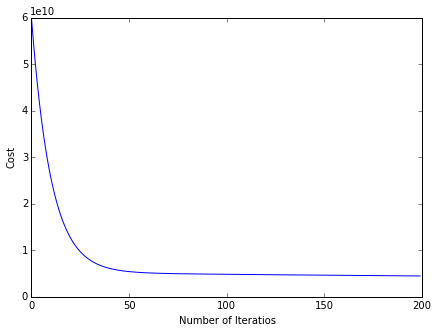

In [150]:
data = np.loadtxt('/Users/peterblouw/git/stat-946/data/multivariate.txt', delimiter=',')

n = len(data)
theta = np.random.rand(3)
rate = 0.03

# Put data into arrays 
bias = np.ones(n).reshape(n,1)
samples = np.hstack((bias, data[:,:2]))
targets = data[:,2]

# Perform feature normalization 
samples = samples / np.max(samples, axis=0)

# Perform updates and store cost values
i = 200
costs = np.zeros(i)

for _ in range(i):
    theta = update(theta)
    costs[_] = cost(theta)
    
# Plot the cost function in relation to the number of iterations   
plt.figure(figsize=(7,5))
plt.plot(np.arange(i), costs)
plt.ylabel('Cost')
plt.xlabel('Number of Iteratios')
plt.show()    

The above plot illustrates that the cost function is being minimized by the update rule. Using different learning rates and numbers of iterations will introduce some variability into this plot, but overall, convergence to a good solution is obtained (provided that the learning rate is not too high).  

# Equivalence to Learning the Weights on a Linear Neuron

Interesting, multivariate linear regression is equivalent to learning the weights on a linear neuron using the delta rule. In discussions of neural networks, the error on this kind of neuron is measured as follows:

$E = \frac{1}{2} \sum \limits_{n \in training} (t^n - y^n)^2$, where $t$ is the target output, and $y$ is the observed output.

The derivative of this error measure with respect to an incoming weight on the neuron is:

$\frac{\partial E}{\partial w_i} = \frac{1}{2} \sum \limits_{n} \frac{\partial y}{\partial w_i} \frac{dE}{dy} = -\sum \limits_{n} x_{i}^n (t^n - y^n)$

The $x_i$ term here corresponds to the partial derivative of $y$ with respect $w_i$ - $x_i$ is the coefficient on the variable $w_i$ and hence is retained after differentiation. The important point is that this formulation is equivalent to the formulation of linear regression given in the previous section. $y^n$ here is the same as $H(x_i)$ above, for instance. The delta rule, finally, is equivalent to the previously discussed update rule absent averaging over the training examples (which, as a constant term, can be rolled into the learning rate):

$\Delta w_i = -\epsilon \frac{\partial E}{\partial w_i} = \epsilon \sum \limits_{n}x_{i}^n(t^n-y^n)$

The change in sign from the earlier case is due to the reversal of the target and predicted values in the error term, which has no impact on the result due to the use of squared error. Overall, it is worth pointing out this equivalence between a linear neuron and linear regression because it can be useful to recognize the ways in which a particular neuron model relates to the use of a particular regression technique.

# Equivalence to the Normal Equations for Solving a Linear System

Because we are using a linear model, it is possible to express the optimization problem being solved in the familiar algebraic form of $Ax = b$. $A$ here is a matrix containing a training example in each row; its columns correspond to the features that describe these examples. $x$ is the parameter vector that we wish to learn, and $b$ is the set of target values we are learning from. If $b$ lies in the columnspace of the feature matrix $A$, then it would be possible to find a parameter vector $x$ that yields a correct prediction for each sample in the training set (whether these predictions would generalize to unseen data is another matter).

Of course, the vector of target values is not likely to lie in the columnspace, so we want to project the vector of target values onto the columnspace. This is equivalent to finding the point in the columnspace that is closest to the vector of target values. Mathematically, solving for this projection can be expression as:

$x = (A^T A)^{-1}A^T b$

This is the closed form solution minimized the squared error between the predicted and target values in the training set. We can compare this solution obtained through this method to the solution obtained through gradient descent:

In [151]:
x = np.dot(np.linalg.inv(np.dot(samples.T, samples)), np.dot(samples.T, targets))

print cost(x)
print cost(theta)

2043280050.6
4479192189.99


There is a fairly substantial discrepency here between the cost of the parameters obtained through gradient descent and the parameters obtained using the closed form solution. However, if the learning rate is reduced slightly and the number of iterations is increased, then the solution obtained through gradient descent converges on the closed form solution. 

# Equivalence to Least Squares Method for Finding Decoders in the NEF

In [152]:
#TODO